In [1]:
import numpy as np
import pandas as pd
import pdb
import os
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df = pd.read_pickle('/home/lashi/assets/clean-data/full_data_161718.pickle')
print(len(df))
print(df.head())

6875516
  tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  PULocationID  \
0  2016-07-10 11:00:00   2016-07-10 10:54:59           1.60           141   
1  2016-07-10 11:00:00   2016-07-10 10:57:00           1.10            79   
2  2016-07-10 11:00:00   2016-07-10 10:55:23           0.84           163   
3  2016-07-10 11:00:00   2016-07-10 10:58:19           1.89           166   
4  2016-07-17 03:00:00   2016-07-17 03:04:51           1.00           148   

   DOLocationID  fare_amount  tip_amount  total_amount  day_of_week  t_bucket  \
0           137          6.5        0.00          7.30            6        22   
1           232          6.5        0.00          7.30            6        22   
2           237          5.5        0.00          6.30            6        22   
3           151          8.5        0.00          9.30            6        22   
4           224          5.0        1.55          7.85            6         6   

   month  cluster_id  
0      7        120

In [3]:
def applyBucketsToFaresAndDist(df):
    val = df.values[:, 5]
    df['fare_bucket'] = np.where(val <= 0, 0, 
                                 np.where(val <= 5, 1, 
                                          np.where(val <= 10, 2, 
                                                   np.where(val <= 15, 3, 
                                                            np.where(val <= 25, 4, 
                                                                     np.where(val <= 50, 5, 
                                                                              np.where(val <= 60, 6, 7)))))))
    
    val = df.values[:, 2]
    df['dist_bucket'] = np.where(val <= 0.5, 0, 
                             np.where(val <= 1.0, 1, 
                                      np.where(val <= 1.5, 2, 
                                               np.where(val <= 2.0, 3, 
                                                        np.where(val <= 3.0, 4, 
                                                                 np.where(val <= 5.0, 5, 
                                                                          np.where(val <= 10.0, 6, 7)))))))
    print(df.head())


In [4]:
applyBucketsToFaresAndDist(df)
df.to_pickle('/home/lashi/assets/clean-data/full_data_161718_bucketed.pickle')

  tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  PULocationID  \
0  2016-07-10 11:00:00   2016-07-10 10:54:59           1.60           141   
1  2016-07-10 11:00:00   2016-07-10 10:57:00           1.10            79   
2  2016-07-10 11:00:00   2016-07-10 10:55:23           0.84           163   
3  2016-07-10 11:00:00   2016-07-10 10:58:19           1.89           166   
4  2016-07-17 03:00:00   2016-07-17 03:04:51           1.00           148   

   DOLocationID  fare_amount  tip_amount  total_amount  day_of_week  t_bucket  \
0           137          6.5        0.00          7.30            6        22   
1           232          6.5        0.00          7.30            6        22   
2           237          5.5        0.00          6.30            6        22   
3           151          8.5        0.00          9.30            6        22   
4           224          5.0        1.55          7.85            6         6   

   month  cluster_id  fare_bucket  dist_bucket  
0

In [30]:
def applyBucketsToActivity(df):
    val = df.values[:, 3]
    df['activity_bucket'] = np.where(val <= 2, 0, 
                                     np.where(val <= 5, 1, 
                                              np.where(val <= 7, 2, 
                                                       np.where(val <= 10, 3, 
                                                                np.where(val <= 15, 4, 
                                                                         np.where(val <= 25, 5,
                                                                                  np.where(val <= 35, 6, 
                                                                                           np.where(val <= 45, 7, 8))))))))    
    print(df.head())

In [31]:
df = pd.read_pickle('/home/lashi/assets/clean-data/activity_master_unbucketed.pickle')
df.head()

,cluster_id,day_of_week,t_bucket,activity
0,0,0,8,1
1,0,0,14,1
2,0,0,22,1
3,0,0,28,2
4,0,0,29,2


DescribeResult(nobs=105067, minmax=(26, 546), mean=80.70175221525312, variance=2799.823654725764, skewness=1.8425503008657016, kurtosis=4.98306824251604)

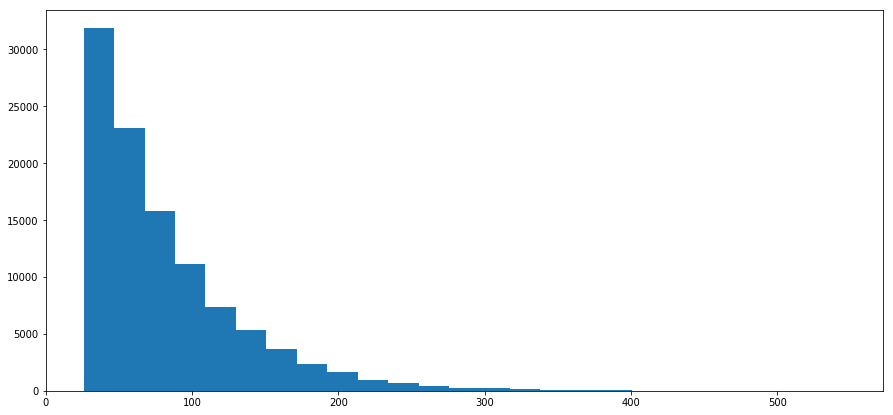

In [32]:
clusters = df.activity

clusters_interst = clusters[clusters > 25]
plt.figure(figsize=(15,7))
plt.hist(clusters_interst, bins=25)
scipy.stats.describe(clusters_interst)

In [33]:
applyBucketsToActivity(df)
# print(df.head())
df.to_pickle('/home/lashi/assets/clean-data/activity_master.pickle')
# print(df.loc[df['activity_bucket'] == 5])

   cluster_id  day_of_week  t_bucket  activity  activity_bucket
0           0            0         8         1                0
1           0            0        14         1                0
2           0            0        22         1                0
3           0            0        28         2                0
4           0            0        29         2                0
        cluster_id  day_of_week  t_bucket  activity  activity_bucket
662             18            1        45        16                5
679             18            2        15        16                5
682             18            2        18        17                5
708             18            2        44        18                5
709             18            2        45        17                5
731             18            3        20        16                5
741             18            3        30        17                5
753             18            3        42        21             